In [1]:
options(repr.plot.width=8, repr.plot.height=4) #Something to help adjust the shape of the plot

# Lab 6
## By Musa Rasheed (25618232)

A certain species of bird is historically known to have a Normally distributed flight speed with 
a mean of 40 km/hr and a standard deviation of 3 km/hr. You would like to estimate the true 
variance of the flight speed using a sample of birds.
Find the “best” estimator of true population variance from the following three estimators:

$$
S_0^2 = \frac{1}{n} \sum^n_{i=1} (X_i - \bar{X})^2\\
S_1^2 = \frac{1}{n-1} \sum^n_{i=1} (X_i - \bar{X})^2\\
S_2^2 = \frac{1}{n-2} \sum^n_{i=1} (X_i - \bar{X})^2
$$

## 1) Draw 10,000 samples of size 10 from the distribution identified above, and calculate the value of each of the above three estimators $s_0^2, s_1^2, s_2^2$ for each of the 10,000 samples.

Let's make an empty matrix and generate some data:

In [2]:
##### Making the matrix #####
m = 10000
n = 10

#So 10,000 samples (the rows) and each row has 10 numbers (sample size 10)

mu = 40
sigma = 3

data = matrix(0, nrow = m, ncol = n)

In [3]:
##### Generate the data #####
for(i in 1:m){
    data[i,] = rnorm(n, mean = mu, sd = sigma)
}

In [4]:
##### Find the sample variance for each row #####
s0_var = rep(0,m)
s1_var = rep(0,m)
s2_var = rep(0,m)

for(i in 1:m){
    dev = data[i,] - mean(data[i,]) #Calculating the deviation for each sample
    
    #Applying the formula of each method and appending it to the respective list
    s0_var[i] = (1/n) * sum(dev^2)
    s1_var[i] = (1/(n-1)) * sum(dev^2)
    s2_var[i] = (1/(n-2)) * sum(dev^2)

}


We've now applied the formulas for each. Since the true population variance should be $9$ (since $\sigma = 3$) the "best" option will be the one who has a mean variance closest to 9:

In [5]:
print(mean(s0_var))
print(mean(s1_var))
print(mean(s2_var))

[1] 8.132549
[1] 9.036166
[1] 10.16569


Before we come to a decision, let's examing the center and variance of each of these with 3 seperate histograms:
# 2: Compare the center and spread of your results for $s_0^2, s_1^2, s_2^2$ using suitable plots and summary statistics. Which estimator would you choose as the best to estimate the population variance? Briefly justify your choice.

## Summary Statstics and plots for S0:

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.476   5.371   7.584   8.133  10.239  28.760 

[1] "The center (mean) is:" "8.13254906464067"     
[1] "The spread (variance) is:" "14.4040953896798"         


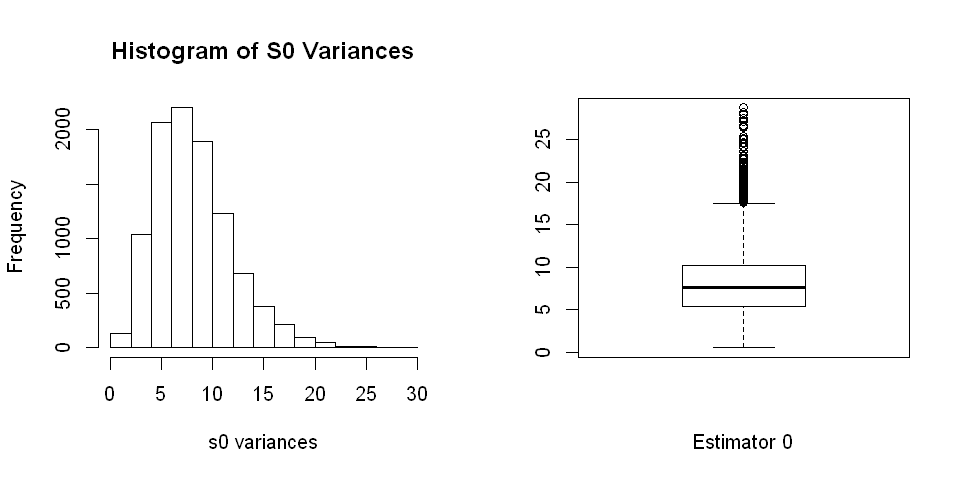

In [6]:
par(mfrow = c(1,2))
hist(s0_var, main = "Histogram of S0 Variances", xlab = "s0 variances")
boxplot(s0_var, xlab = "Estimator 0")

summary(s0_var)
print(c('The center (mean) is:',mean(s0_var)))
print(c('The spread (variance) is:',var(s0_var)))

## Summary Statstics and plots for S1:

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.5289  5.9679  8.4269  9.0362 11.3772 31.9558 

[1] "The center (mean) is:" "9.03616562737852"     
[1] "The spread (variance) is:" "17.7828338144195"         


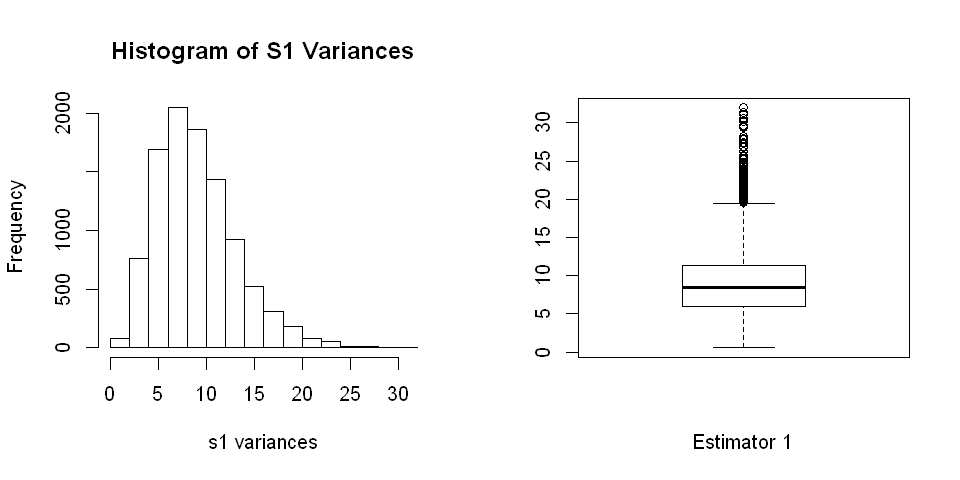

In [7]:
par(mfrow = c(1,2))
hist(s1_var, main = "Histogram of S1 Variances", xlab = "s1 variances")
boxplot(s1_var, xlab = "Estimator 1")

summary(s1_var)
print(c('The center (mean) is:',mean(s1_var)))
print(c('The spread (variance) is:',var(s1_var)))

## Summary Statstics and plots for S2:

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.595   6.714   9.480  10.166  12.799  35.950 

[1] "The center (mean) is:" "10.1656863308008"     
[1] "The spread (variance) is:" "22.5063990463746"         


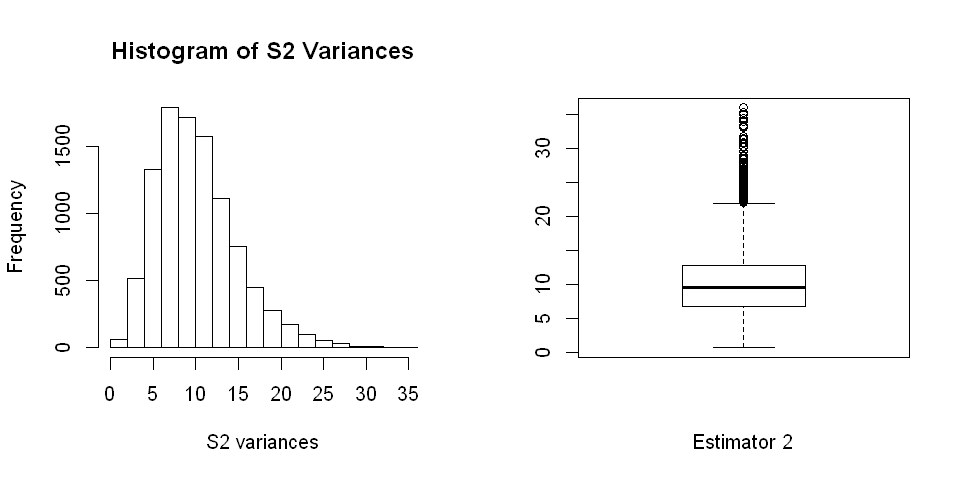

In [8]:
par(mfrow = c(1,2))
hist(s2_var, main = "Histogram of S2 Variances",xlab = "S2 variances")
boxplot(s2_var, xlab = "Estimator 2")

summary(s2_var)
print(c('The center (mean) is:', mean(s2_var)))
print(c('The spread (variance) is:',var(s2_var)))

S1 seems to be the best choice. This is because it had the value closest to that of the true value ($\sigma^2=9$). It did have a higher variance than the s0 formula, so it was more "unsure" of it's results. However, that is not the mark of a good estimator. 

The bias is lowest for the S1 estimator as shown below, making it the ideal choice:

In [9]:
c("The bias for s0 is: ",9-mean(s0_var))
c("The bias for s1 is: ",9-mean(s1_var))
c("The bias for s2 is: ",9-mean(s2_var))
## S1 is the best!

[1] "The bias for s0 is: " "0.867450935359333"

[1] "The bias for s1 is: " "-0.0361656273785194"

[1] "The bias for s2 is: " "-1.16568633080083"

# 3: Generate a suitable plot of the results for the estimator you chose, and describe the shape of the distribution. 

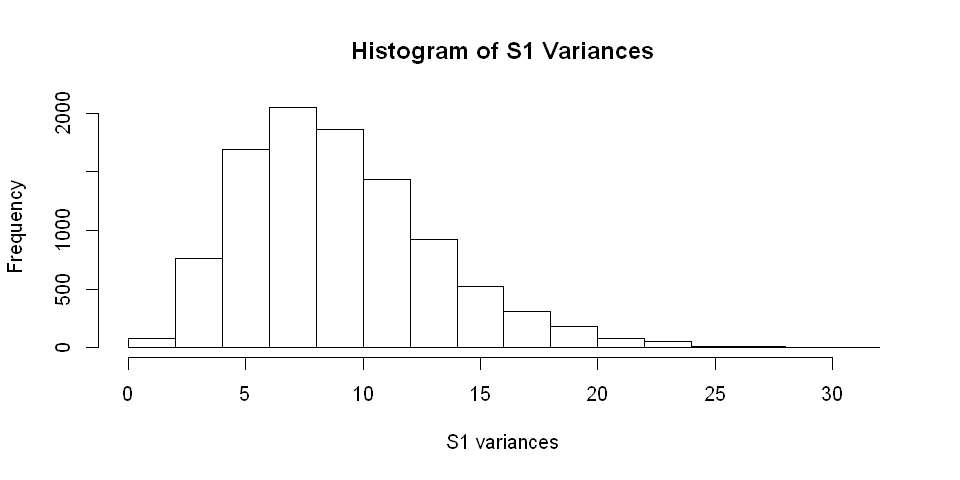

In [10]:
hist(s1_var, main = "Histogram of S1 Variances",xlab = "S1 variances")


This is a right skewed distribution centered at around 9

### Disadvantage of a point distribution
It is often more accurate to have a range of values to test rather than relying on 1 single estiamte. Also, in order to make the point estimator sufficiently accurate, we need quite a bit of data which is not always possible to obtain.

However, it is still easy and fast to calculate, and with sufficient data it is pretty "on the money" so it depends on your scenario. 